# Importing Lib

In [1]:
#import sagemaker
#import boto3
import pandas as pd
import numpy as np
import torch
import scipy
import seaborn as sns
import os
import matplotlib.pyplot as plt

/media/akm/My Work/Programming/virt-env/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Read Data

In [2]:
main_data_path = "Dataset/"

In [3]:
raw_data = pd.read_csv(os.path.join(main_data_path,"patience_data.csv"))

# Explore Data

In [4]:
raw_data.head()

,id,Age,sex,MH,EAM,Hb,RBCs,WBCs,Plat,ESR,CRP,DAS,YKL40,RF,Anticcp,Ast,Alt
0,1.0,43.0,F,no,no,9.1,4.00,9.00,235.0,55.0,12,5.30,17.5,36,131,17.0,17.0
1,2.0,39.0,F,no,no,10.9,4.00,7.40,376.0,45.0,56,5.84,91.5,125,163,10.0,10.0
2,3.0,45.0,F,no,no,12.4,5.00,3.80,315.0,25.0,21.08,4.28,836.4,20,50,17.0,12.0
3,4.0,52.0,M,no,no,11.8,5.19,14.18,334.0,80.0,24.8,5.28,1795.0,148,176,28.0,25.0
4,5.0,50.0,M,no,no,13.1,4.50,7.30,252.0,31.0,23.3,6.20,2083.0,75.5,973,14.0,13.0


In [5]:
raw_data.info() #TODO remove null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       60 non-null     float64
 1   Age      60 non-null     float64
 2   sex      61 non-null     object 
 3   MH       60 non-null     object 
 4   EAM      60 non-null     object 
 5   Hb       60 non-null     float64
 6   RBCs     60 non-null     float64
 7   WBCs     60 non-null     float64
 8   Plat     60 non-null     float64
 9   ESR      60 non-null     float64
 10  CRP      60 non-null     object 
 11  DAS      60 non-null     float64
 12  YKL40    60 non-null     float64
 13  RF       60 non-null     object 
 14  Anticcp  60 non-null     object 
 15  Ast      60 non-null     float64
 16  Alt      60 non-null     float64
dtypes: float64(11), object(6)
memory usage: 8.2+ KB


In [6]:
raw_data.describe()

,id,Age,Hb,RBCs,WBCs,Plat,ESR,DAS,YKL40,Ast,Alt
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,45.916667,11.293333,4.286167,6.426333,293.033333,31.266667,4.160667,303.751667,23.966667,22.866667
std,17.464249,10.469150,1.455541,0.513136,2.203839,94.010812,20.957476,1.324715,450.349329,6.645928,7.012016
min,1.000000,27.000000,7.000000,3.300000,3.590000,124.000000,10.000000,1.900000,8.000000,10.000000,10.000000
25%,15.750000,39.000000,10.500000,4.000000,4.900000,238.750000,15.000000,3.000000,28.625000,19.000000,18.000000
50%,30.500000,45.000000,11.300000,4.185000,6.250000,280.000000,25.500000,4.020000,101.500000,22.000000,22.000000
75%,45.250000,52.000000,12.225000,4.500000,7.200000,330.500000,38.000000,5.330000,428.700000,30.000000,28.000000
max,60.000000,70.000000,15.000000,5.700000,14.800000,697.000000,100.000000,6.200000,2083.000000,38.000000,38.000000


In [7]:
for column in raw_data.columns:
    print(f"column: {column} {len(raw_data[column].unique())}")

column: id 61
column: Age 30
column: sex 2
column: MH 2
column: EAM 2
column: Hb 36
column: RBCs 26
column: WBCs 44
column: Plat 49
column: ESR 29
column: CRP 43
column: DAS 52
column: YKL40 56
column: RF 28
column: Anticcp 56
column: Ast 23
column: Alt 21


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       60 non-null     float64
 1   Age      60 non-null     float64
 2   sex      61 non-null     object 
 3   MH       60 non-null     object 
 4   EAM      60 non-null     object 
 5   Hb       60 non-null     float64
 6   RBCs     60 non-null     float64
 7   WBCs     60 non-null     float64
 8   Plat     60 non-null     float64
 9   ESR      60 non-null     float64
 10  CRP      60 non-null     object 
 11  DAS      60 non-null     float64
 12  YKL40    60 non-null     float64
 13  RF       60 non-null     object 
 14  Anticcp  60 non-null     object 
 15  Ast      60 non-null     float64
 16  Alt      60 non-null     float64
dtypes: float64(11), object(6)
memory usage: 8.2+ KB


In [9]:
raw_data.dropna(inplace=True)

In [10]:
raw_data.drop("id",axis=1,inplace=True)

# Visualize Data

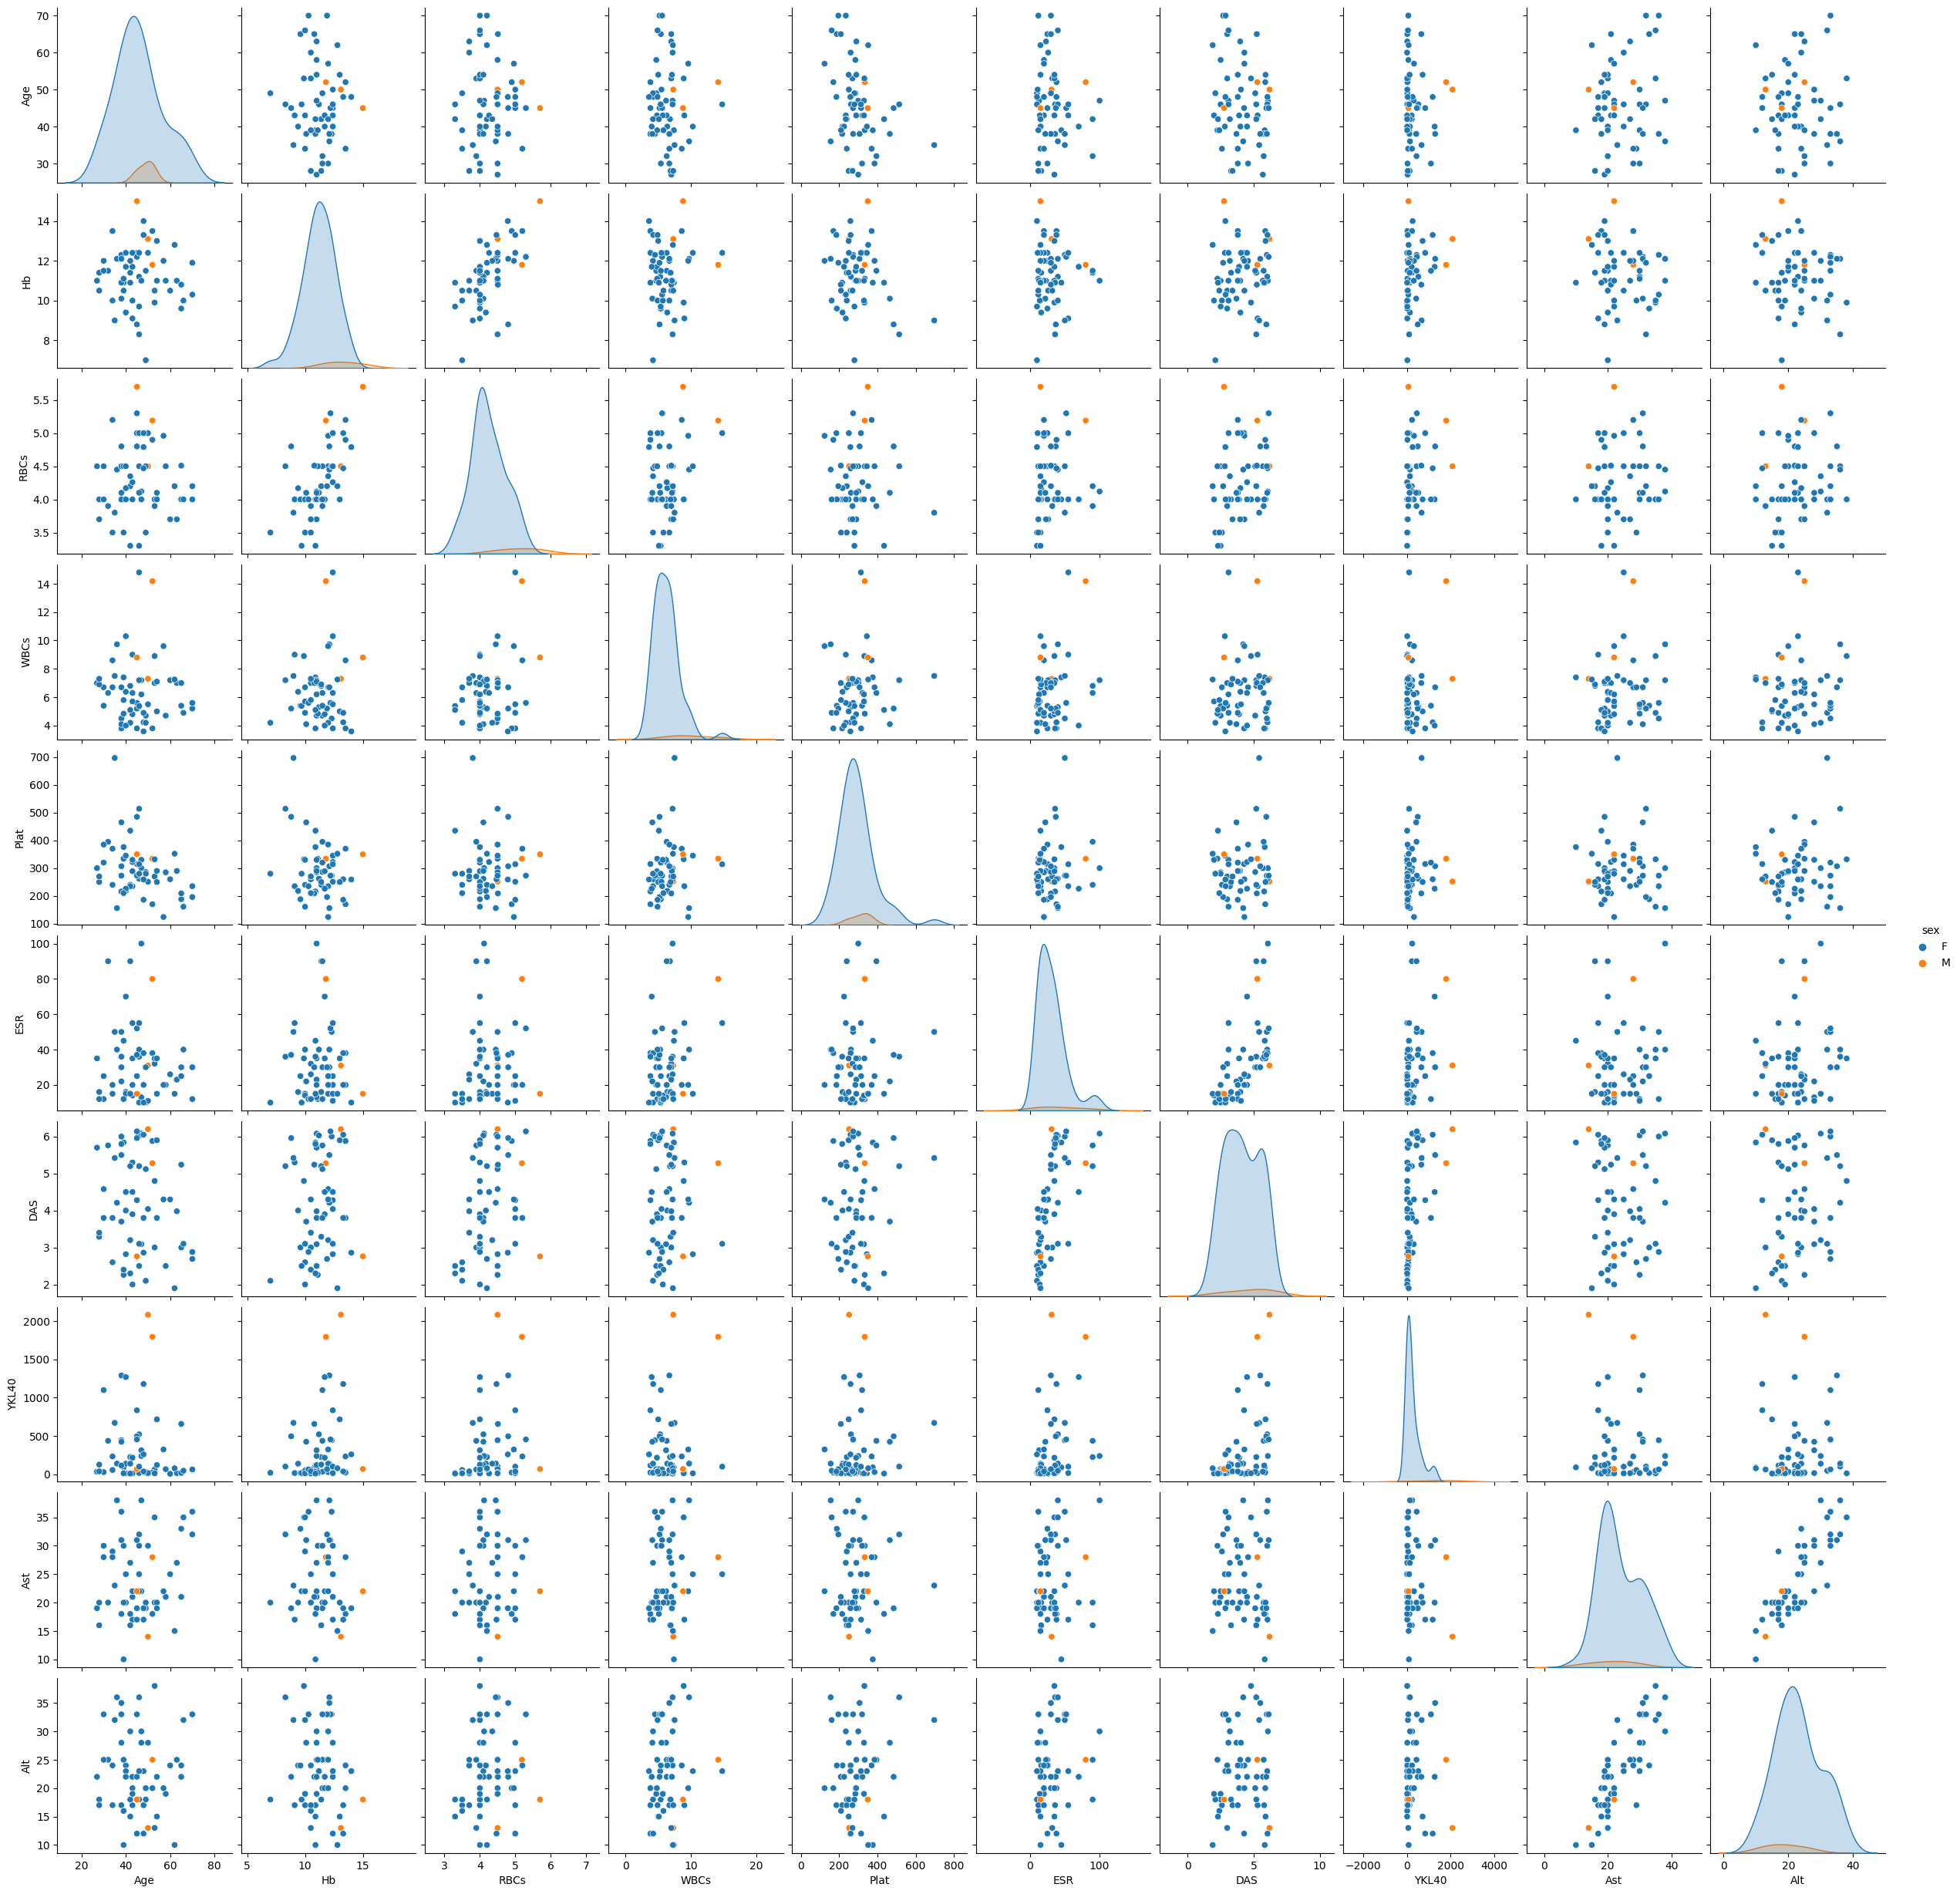

In [32]:
sns.pairplot(raw_data,hue="sex")

4


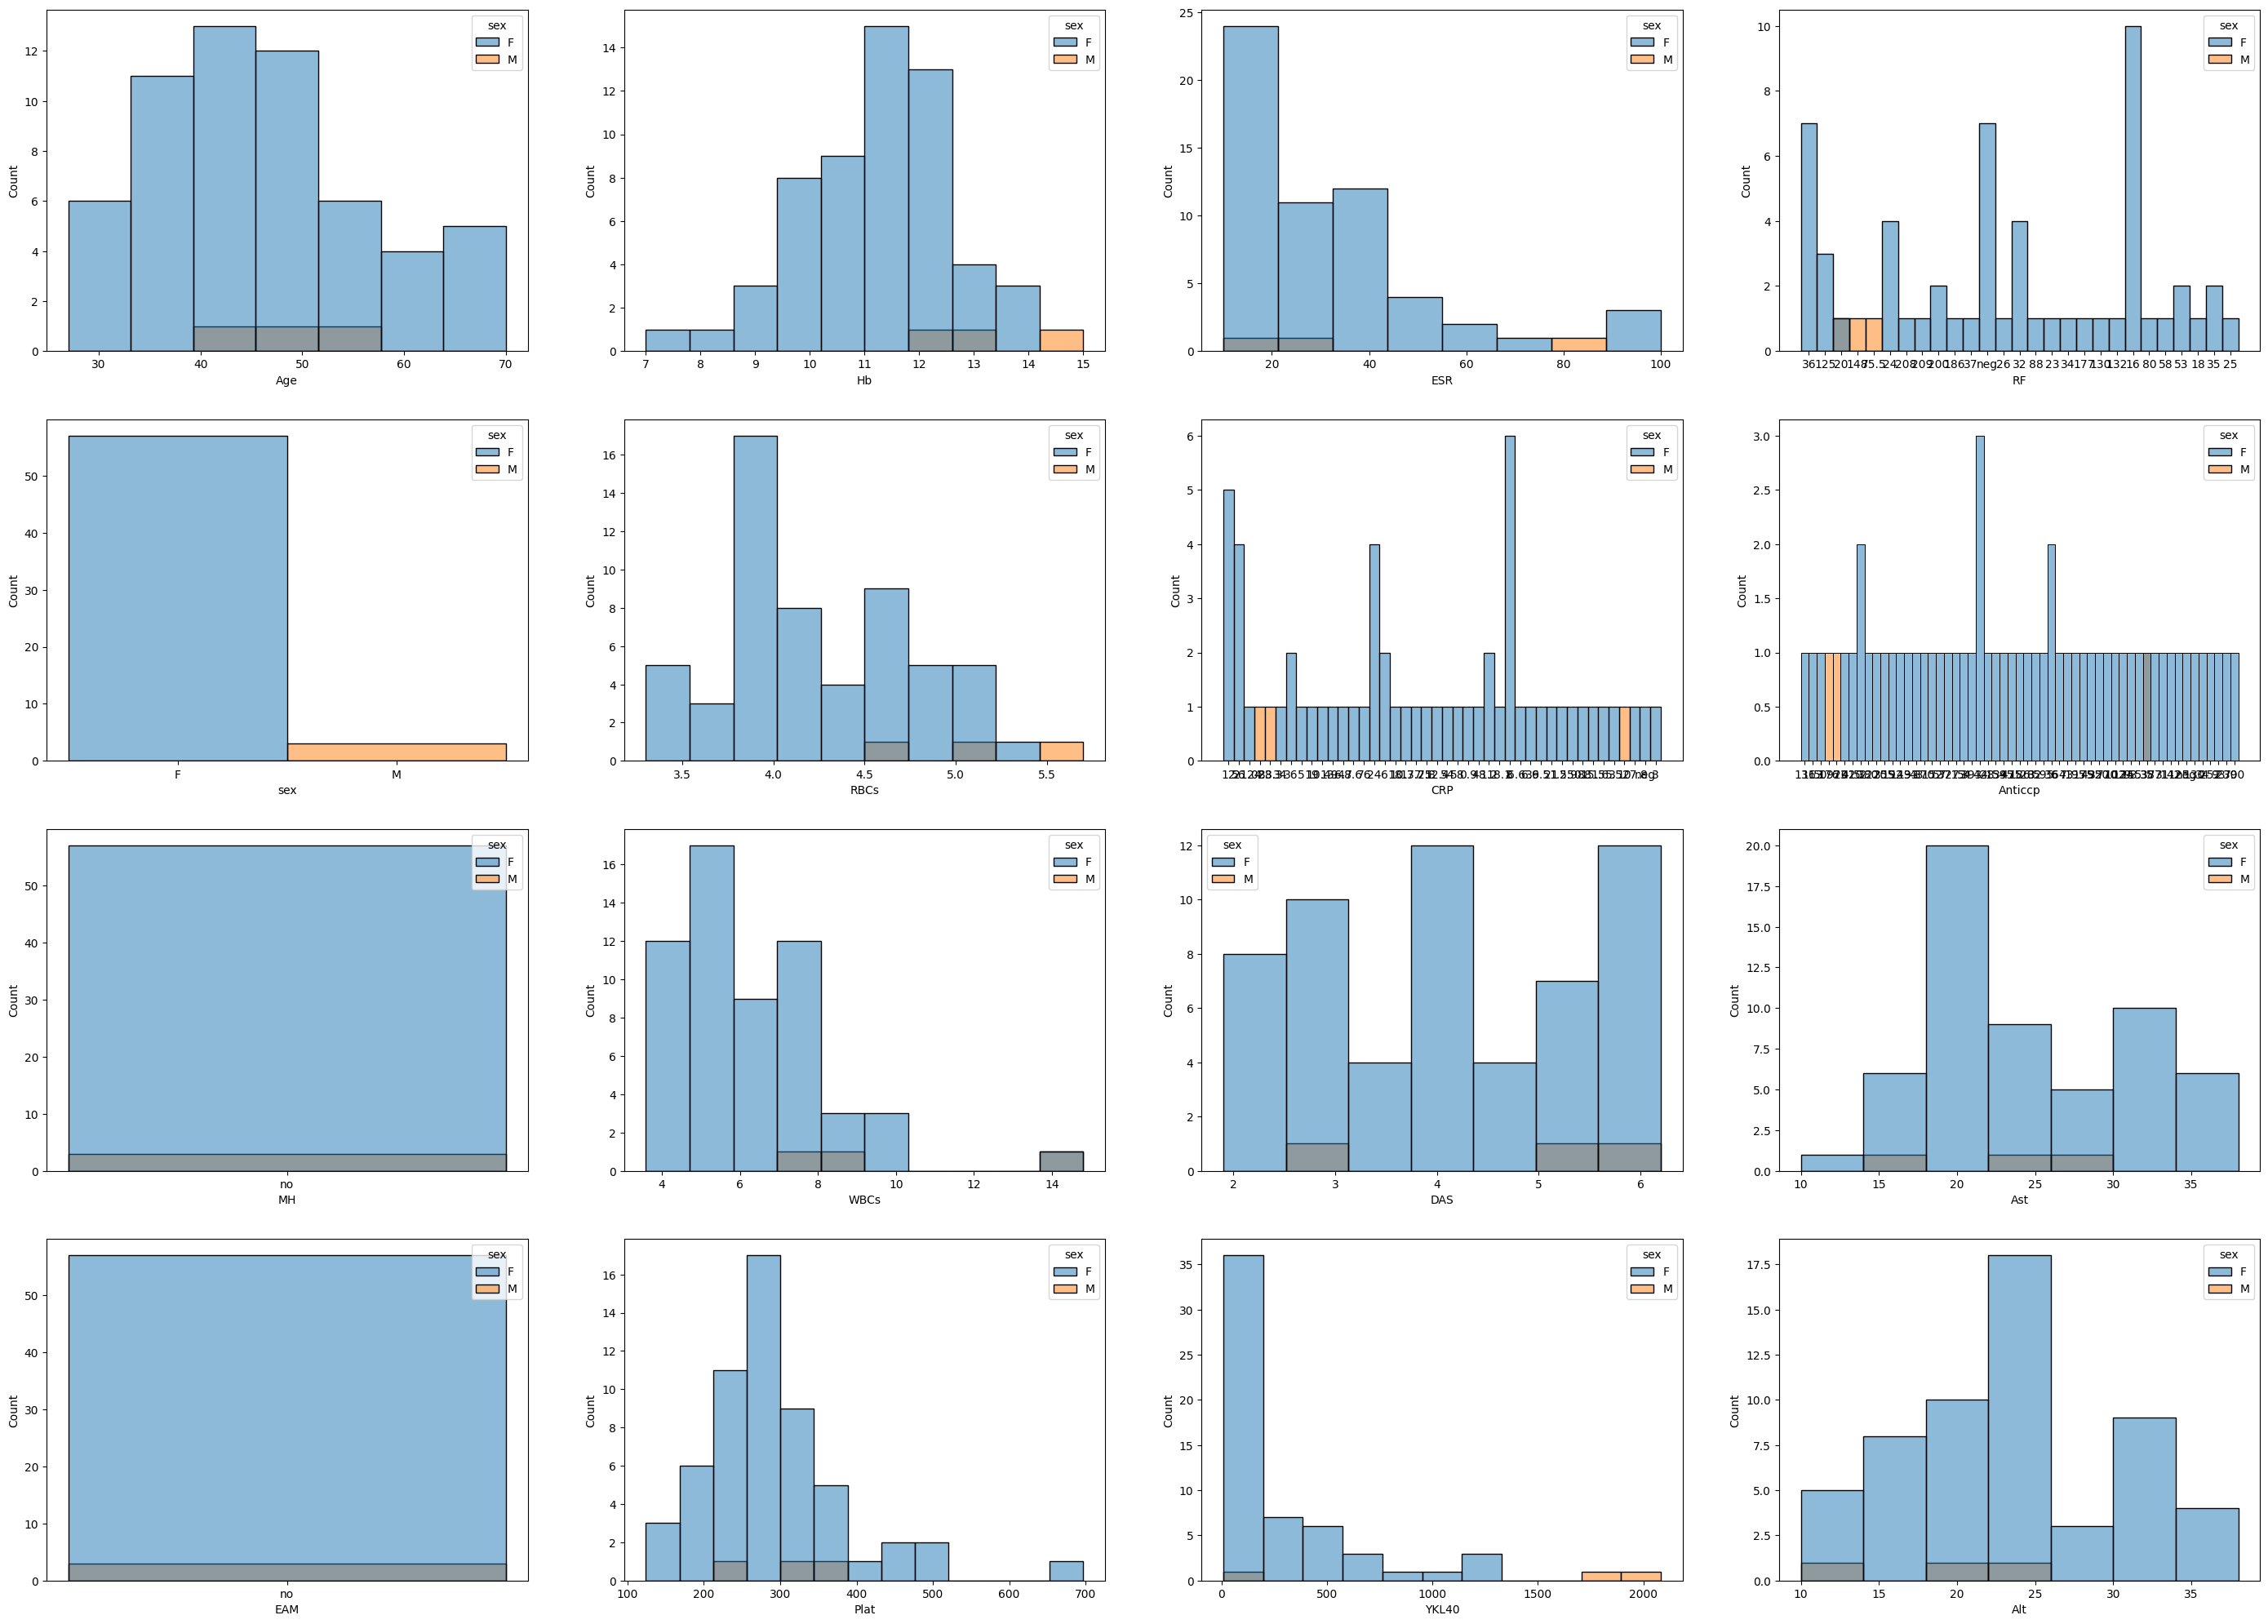

In [48]:
number_of_sub_plots = int((len(raw_data.columns)/2)/2)
print(number_of_sub_plots)
fig, axs = plt.subplots(number_of_sub_plots, number_of_sub_plots, figsize=(35, 25))
xid = 0
yid = 0
for col in raw_data.columns:
    sns.histplot(raw_data,x=col,hue="sex",ax=axs[xid,yid])
    xid+=1
    if xid >= number_of_sub_plots:
        xid=0
        yid+=1
plt.show()

/tmp/ipykernel_30504/3293039288.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr())


<AxesSubplot: >

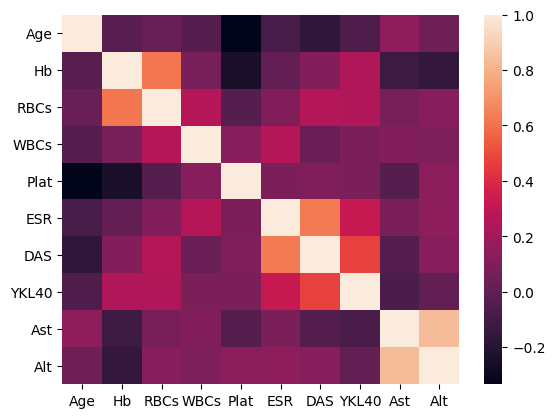

In [49]:
sns.heatmap(raw_data.corr()) 

# Prepare Data

In [11]:
processed_data = raw_data

In [12]:
if not os.path.exists("preprocess_module/"):
    os.makedirs("preprocess_module/")

In [13]:
%%writefile preprocess_module/preprocessor.py
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import os 
import pickle
def label_encod(data,column_name):
    main_path = os.path.join("Dataset","artifacts")
    if not os.path.exists(main_path):
        os.makedirs(main_path)

    encoder_path = os.path.join("Dataset","artifacts",column_name+".pkl")
    if not os.path.exists(encoder_path): 
        encoder = LabelEncoder()
        transformed_data = encoder.fit_transform(data)
        pickle.dump(encoder,open(encoder_path, 'wb'))
    else: # If it's their, then I just want to you use it to inverse transform // Could be used to transform but no need to make several functions as in this project type we only transform the original data and won't use it again
        encoder = pickle.load(open(encoder_path,'rb')) 
        transformed_data = encoder.inverse_transform(data)
    return transformed_data

def scale_data(data,column_name):
    main_path = os.path.join("Dataset","artifacts")
    if not os.path.exists(main_path):
        os.makedirs(main_path)
        
    scaler_path = os.path.join("Dataset","artifacts",column_name+".pkl")
    if not os.path.exists(scaler_path):
        scaler = MinMaxScaler()
        transformed_data = scaler.fit_transform(data.to_numpy().reshape(-1,1))
        pickle.dump(scaler,open(scaler_path, 'wb'))
    else:
        scaler = pickle.load(open(scaler_path,'rb')) 
        transformed_data = scaler.inverse_transform(data.to_numpy().reshape(-1,1))
    return transformed_data

Writing preprocess_module/preprocessor.py


In [16]:
from preprocess_module.preprocessor import scale_data,label_encod

In [18]:
str_col = ["sex","MH","EAM"]
num_col = ["Age","Hb","RBCs","WBCs","Plat","ESR","CRP","DAS","YKL40","RF","Anticcp","Ast","Alt"]

In [26]:
processed_data["Anticcp"].unique() # Some columns has "neg" values which need to be converted numbers, I will make them 0

array(['131', '163', '50', '176', '973', '201', '420', '52', '380', '220',
       '355', '192', '143', '193', '43', '370', '152', '57', '371', '273',
       '54', '393', '42', '48', '154', '395', '475', '186', '28', '32',
       '595', '36', '64', '73', '195', '175', '495', '320', '770', '102',
       '134', '255', '93.37', '35', '87', '31', '142', '125', 'neg',
       '130', '34', '252', '93', '239', '700'], dtype=object)

In [27]:
processed_data[processed_data["CRP"]=="neg"] = 0
processed_data[processed_data["RF"]=="neg"] = 0
processed_data[processed_data["Anticcp"]=="neg"] = 0

In [24]:
for col in str_col:
    processed_data[col] = label_encod(processed_data[col],col)

for col in num_col:
    processed_data[col] = scale_data(processed_data[col],col)

ValueError: y contains previously unseen labels: ['F' 'M']

In [28]:
processed_data.head()

,Age,sex,MH,EAM,Hb,RBCs,WBCs,Plat,ESR,CRP,DAS,YKL40,RF,Anticcp,Ast,Alt
0,43.0,F,no,no,9.1,4.00,9.00,235.0,55.0,12,5.30,17.5,36,131,17.0,17.0
1,39.0,F,no,no,10.9,4.00,7.40,376.0,45.0,56,5.84,91.5,125,163,10.0,10.0
2,45.0,F,no,no,12.4,5.00,3.80,315.0,25.0,21.08,4.28,836.4,20,50,17.0,12.0
3,52.0,M,no,no,11.8,5.19,14.18,334.0,80.0,24.8,5.28,1795.0,148,176,28.0,25.0
4,50.0,M,no,no,13.1,4.50,7.30,252.0,31.0,23.3,6.20,2083.0,75.5,973,14.0,13.0


In [ ]:
processed_data.to_csv(os.path.join(main_data_path,"processed_data.csv"),index=False)

# Visualize Data after processing

In [ ]:
number_of_sub_plots = int((len(raw_data.columns)/2)/2)
print(number_of_sub_plots)
fig, axs = plt.subplots(number_of_sub_plots, number_of_sub_plots, figsize=(35, 25))
xid = 0
yid = 0
for col in raw_data.columns:
    sns.histplot(raw_data,x=col,hue="sex",ax=axs[xid,yid])
    xid+=1
    if xid >= number_of_sub_plots:
        xid=0
        yid+=1
plt.show()

In [ ]:
sns.pairplot(processed_data,hue="sex")

In [ ]:
sns.heatmap(processed_data.corr())

## Uploading data to S3 bucket

In [29]:
#TODO get the bucket as well as region
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
role = sagemaker.get_execution_role()
session = boto3.session.Session()
region = session.region_name

In [ ]:
#TODO Upload the prepared data using boto3
inputs = sagemaker_session.upload_data(path=main_data_path, bucket=bucket)#, key_prefix=prefix)
print("input spec (in this case, just an S3 path): {}".format(inputs))

# Train Model

I will put all modules in one python file only for simplicity.

In [1]:
%%writefile train_diff_generator.py
import torch
from torch.nn import Linear
import torch.nn as nn
import torch.nn.functional as F
import os
import copy
import numpy as np
from torch import optim
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import logging
import argparse


class EMA_model:
    def __init__(self, beta):
        super().__init__()
        self.beta = beta
        self.step = 0

    def update_model_average(self, ma_model, current_model):
        for current_params, ma_params in zip(current_model.parameters(), ma_model.parameters()):
            old_weight, up_weight = ma_params.data, current_params.data
            ma_params.data = self.update_average(old_weight, up_weight)

    def update_average(self, old, new):
        if old is None:
            return new
        return old * self.beta + (1 - self.beta) * new

    def step_ema(self, ema_model, model, step_start_ema=2000):
        if self.step < step_start_ema:
            self.reset_parameters(ema_model, model)
            self.step += 1
            return
        self.update_model_average(ema_model, model)
        self.step += 1

    def reset_parameters(self, ema_model, model):
        ema_model.load_state_dict(model.state_dict())


class Generator_conditional(nn.Module):
    def __init__(self, input_features=15, output_features=15, time_dim=1, num_classes=2):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.time_dim = time_dim
        self.inc = Linear(input_features, input_features)
        self.flatten = nn.Flatten()
        self.s1 = Linear(input_features,64)
        self.s2 = Linear(64,120)
        self.s3 = Linear(120,64)
        self.outc = Linear(64, output_features)
        if num_classes is not None:
            self.label_emb = nn.Embedding(num_classes, time_dim)
    
    def pos_encoding(self, t, channels):
        inv_freq = 1.0 / (
            10000
            ** (torch.arange(0, channels, 2, device=self.device).float() / channels)
        )
        pos_enc_a = torch.sin(t.repeat(1, channels // 2) * inv_freq)
        pos_enc_b = torch.cos(t.repeat(1, channels // 2) * inv_freq)
        pos_enc = torch.cat([pos_enc_a, pos_enc_b], dim=-1)
        return pos_enc.type(torch.FloatTensor).to(self.device)
    
    def forward(self, x, t, y):
        t = t.unsqueeze(-1).type(torch.float)
        t = self.pos_encoding(t, self.time_dim)
        
        x1 = self.inc(x)
        x1 = F.relu(x1)
        if y is not None:
            t += self.label_emb(y)
        
        if len(x1.shape) < 2:
            x1 = torch.unsqueeze(x1,1)
        x2 = torch.cat((x1,t),1)
        x2 = torch.squeeze(x2)
        x2 = self.s1(x2)
        x2 = F.relu(x2)
        x2 = self.s2(x2)
        x2 = F.relu(x2)
        x2 = self.s3(x2)
        x2 = F.relu(x2)
        output = self.outc(x2)
        output = F.relu(output)
        return output

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =



def get_data(args):
    data_path = args.data_dir
    data = pd.read_csv(data_path)
    label = torch.from_numpy(data["sex"].to_numpy())
    inputs = torch.from_numpy(data.drop("sex",axis=1).to_numpy())
    dataset = TensorDataset(inputs,label)
    return DataLoader(dataset)

class Diffusion:
    def __init__(self, noise_steps=1000, beta_start=1e-4, beta_end=0.02, num_feature=15):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.noise_steps = noise_steps
        self.beta_start = beta_start
        self.beta_end = beta_end

        self.beta = self.prepare_noise_schedule().to(self.device)
        self.alpha = 1. - self.beta
        self.alpha_hat = torch.cumprod(self.alpha, dim=0)

        #self.data_shape = num_feature 

    def prepare_noise_schedule(self):
        #return torch.cos(torch.linspace(self.beta_start, self.beta_end, self.noise_steps))
        return torch.linspace(self.beta_start, self.beta_end, self.noise_steps)

    def noise_data(self, x,t):
        sqrt_alpha_hat = torch.sqrt(self.alpha_hat[t])
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alpha_hat[t])
        Ɛ = torch.normal(0.5, 0.24, size=x.shape).to(self.device)#torch.randn_like(x)
        return sqrt_alpha_hat * x + sqrt_one_minus_alpha_hat * Ɛ, Ɛ

    def sample_timesteps(self, n):
        n_shape = n.shape[0] 
        return torch.randint(low=1, high=self.noise_steps, size=(n_shape,))


def train(args):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    dataloader = get_data(args)
    model = Generator_conditional(input_features=args.num_feature, output_features=args.num_feature,num_classes=args.num_classes)
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=args.lr)
    mse = nn.MSELoss()
    diffusion = Diffusion(num_feature=args.num_feature)
    l = len(dataloader)
    ema = EMA_model(0.995)
    ema_model = copy.deepcopy(model).eval().requires_grad_(False)

    best_mae_score = 100 # Initial arbitrary number
    for epoch in range(args.epochs):
        mae = nn.L1Loss()
        origin_data = []
        predicted_data = []
        for i, (input_data, labels) in enumerate(dataloader):
            input_data = torch.squeeze(input_data).type(torch.float) #The reason for this line is cuda is producing none reasonable error if the shape isn't [15], probably can't use batch_size, (the error isn't produced if we run on cpu)
            origin_data.append(input_data)
            input_data = input_data.to(device)
            labels = labels.to(device)
            t = diffusion.sample_timesteps(input_data).to(device)
            x_t, noise = diffusion.noise_data(input_data, t)
            x_t = x_t.type(torch.float).to(device)
            noise = noise.type(torch.float).to(device)

            if np.random.random() < 0.1:
                labels = None
            predicted_noise = model(x_t, t, labels)
            predicted_data.append(predicted_noise)
            loss = mae(predicted_noise, input_data) #mse(predicted_noise, input_data)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            ema.step_ema(ema_model, model)

        #torch.save(optimizer.state_dict(), os.path.join(main_path, f"optimzer.pt"))
        mae_score = mae(predicted_noise,input_data)
        mse_score = mse(predicted_noise, input_data)
        if mae_score < best_mae_score:
            saving_path = args.model_dir
            #save_model(model, saving_path, "main_model")
            save_model(ema_model, saving_path, "ema_model")
            print("-----------------saved model-----------------")
            best_mae_score = mae_score
        print(f"Mean Absolute Error: {mae_score}, and MSE score: {mse_score}")
        logger.info(f"Mean Absolute Error: {mae_score}")
        logger.info(f"and MSE score: {mse_score}")
        origin_data = []
        predicted_data = []

def save_model(model,path,model_name):
    torch.save(model, os.path.join(path, f"{model_name}.pt"))


def launch():
    parser = argparse.ArgumentParser()
    
    args.add_argument("--epochs",type=int, default=300,helper="numbers of epochs for training")
    #args.add_argument("--run_name",type=str, default = "DDPM_conditional", helper="your model will be saved in the name of your run")
    args.add_argument("--num_feature",type=int,default = 15, helper="Number of features of your tabular data")
    args.add_argument("--num_classes",type=int,default= = 2, helper="Number of labels your condition has")
    args.add_argument("--lr", type=float, default=0.0001, helper="learning rate for ML model")

    parser.add_argument("--model-dir", type=str, default=os.environ["SM_MODEL_DIR"])
    parser.add_argument("--data-dir", type=str, default=os.environ["SM_CHANNEL_TRAINING"])
    args = parser.parse_args()
    train(args)


Writing train_diff_generator.py


Define the hyperparameter tuning range of your model

In [ ]:
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

In [ ]:
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.00001, 0.1),
    "epochs": IntegerParameter(500, 3000)
}

In [ ]:
args = {}
args["run_name"] = "DDPM_conditional"
args["epochs"] = 2000
args["num_feature"] = 15
args["num_classes"] = 2
args["lr"] = 0.0001

In [ ]:
objective_metric_name = "Mean Absolute Error Score"
objective_type = "Minimize"
metric_definitions = [{"Name": "Mean Absolute Error Score", "Regex": "Mean Absolute Error: ([0-9\\.]+)"}]

In [ ]:
#TODO Define your estimator and instance type
estimator = PyTorch(
    entry_point="train_diff_generator.py",
    role=role,
    py_version='py36',
    #framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.xlarge" #TODO pick a GPU one as it will take long time to train
)

In [ ]:
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=2, #There is no balance enough to run multiple jobs
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [ ]:
tuner.fit(inputs)

In [ ]:
best_estimator = tuner.best_estimator()#TODO
hyperparameters = best_estimator.hyperparameters()

In [ ]:
hyperparameters

In [ ]:
estimator = PyTorch(
    role=role,
    instance_count=1,
    instance_type="ml.m5.xlarge",
    entry_point="train_model.py",
    framework_version="1.8",
    py_version="py36",
    hyperparameters=hyperparameters,
)

In [ ]:
estimator.fit(inputs)

In [ ]:
#TODO estimator.deploy(instance="")
predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.m5.large")

In [ ]:
# In case you deleted the end point, you can redeploy the same mode by uncommenting next line
# TODO get training job name
# TODO get estimator from training job name

# Evaluate Model

In [ ]:
#TODO make a step functions with lambda models that accepts number of samples then triggers endpoint to get predictions and inverse transform it to use

In [ ]:
#predictor.delete_endpoint()